In [17]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from math import sin, sqrt, pi

In [36]:
class ParticleInABox2d:
    def __init__(self, mass=1, length=1):
        """
        Parameters
        ----------
        mass: float
            The mass of the particle.
        
        length:
            Legnth of each side of the box in x and y dimensions.
        """
        self.mass = mass
        self.length = length
        
    def wavefunction(self, n, k, x, y):
        """
        Parameters
        ----------
        n: int
            Quantum number in the x dimension
            
        k: int
            Quantum number in the y dimension
            
        x: float
            x position in the box. Range from zero to self.length
            
        y: float
            y position in the box. Range from zero to self.length
            
        Returns
        -------
        float
            The value of the wavefunction n, k at x, y
        """
        return (2 / self.length) * sin(n * pi * x / self.length) * sin(k * pi * y / self.length)
    
    def sq_wavefunction(self, n, k):
        """
        Parameters
        ----------
        n: int
            Quantum number in the x dimension
        
        k: int
            Quantum number in the y dimension
            
        Returns
        -------
        np.array
            Float 2d numpy array of squares of wavefunctions at the various
            points.
        """
        points = 100
        xs = np.linspace(0.0, self.length, points)
        ys = np.linspace(0.0, self.length, points)
        zs = np.zeros((points, points), np.float64)
        for ix, x in enumerate(xs):
            for iy, y in enumerate(ys):
                zs[ix, iy] = self.wavefunction(n, k, x, y) ** 2
        return xs, ys, zs

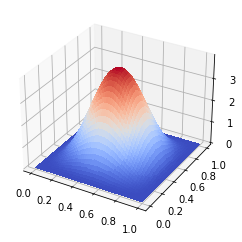

In [52]:
box_2d = ParticleInABox2d(mass=1.0, length=1.0)
box_2d.sq_wavefunction(n=1, k=1)
# fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), subplot_kw={'projection': '3d'})
# zs = box_2d.sq_wavefunction(1, 1)
# xs = np.arange(zs.shape[0])
# ys = np.arange(zs.shape[1])
# axs.plot_surface(xs, ys, zs, c=zs)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

xs, ys, zs = box_2d.sq_wavefunction(1, 1)
xs, ys = np.meshgrid(xs, ys)

# Plot the surface.
surf = ax.plot_surface(ys, xs, zs, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


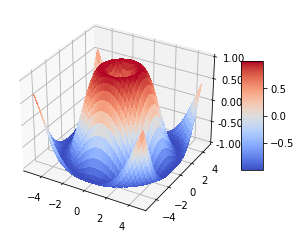

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.75, -4.75, -4.75, ..., -4.75, -4.75, -4.75],
       [-4.5 , -4.5 , -4.5 , ..., -4.5 , -4.5 , -4.5 ],
       ...,
       [ 4.25,  4.25,  4.25, ...,  4.25,  4.25,  4.25],
       [ 4.5 ,  4.5 ,  4.5 , ...,  4.5 ,  4.5 ,  4.5 ],
       [ 4.75,  4.75,  4.75, ...,  4.75,  4.75,  4.75]])

In [50]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

Y